### Reading online data 

In [4]:
import pandas as pd

In [39]:
myfile1=pd.read_table("http://bit.ly/chiporders")

myfile1.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Remove [] from 'choice_description' column

In [40]:
df1=myfile1

df1["choice_description"]=df1.choice_description.str.replace("[\[\]]","") # Way one to remove []

df1.head()

df2=myfile1 # Second choice to remove []

df2["choice_description"]=df2.choice_description.str.replace("[","").str.replace("]","")

df2.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98


#### Using str contain in Pandas

In [50]:
df3=df2[df2.item_name.str.contains("Chicken")]

df3.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",$10.98
11,6,1,Chicken Crispy Tacos,"Roasted Chili Corn Salsa, Fajita Vegetables, R...",$8.75
12,6,1,Chicken Soft Tacos,"Roasted Chili Corn Salsa, Rice, Black Beans, C...",$8.75
13,7,1,Chicken Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Rice, C...",$11.25


### Adding another column to myfile1

In [51]:

myfile1["Col1"]=myfile1.order_id+myfile1.quantity

myfile1.head()



,order_id,quantity,item_name,choice_description,item_price,Col1
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2
1,1,1,Izze,Clementine,$3.39,2
2,1,1,Nantucket Nectar,Apple,$3.39,2
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98,4


## Sorting data

In [52]:
myfile1.sort_values("item_name", inplace=True)

myfile1.head()

,order_id,quantity,item_name,choice_description,item_price,Col1
3389,1360,2,6 Pack Soft Drink,Diet Coke,$12.98,1362
341,148,1,6 Pack Soft Drink,Diet Coke,$6.49,149
1849,749,1,6 Pack Soft Drink,Coke,$6.49,750
1860,754,1,6 Pack Soft Drink,Diet Coke,$6.49,755
2713,1076,1,6 Pack Soft Drink,Coke,$6.49,1077


### Converting pandas data type


In [56]:
df4=myfile1

df4["order_id"]=df4.order_id.astype(float)

df4.dtypes

order_id              float64
quantity                int64
item_name              object
choice_description     object
item_price             object
Col1                    int64
dtype: object

###### Define column names and some initial tasks

In [19]:
columns_name=["ID","Age","Gender","Job","Zip"]

myfile2=pd.read_table("http://bit.ly/movieusers", sep="|", header=None, names=columns_name)

print(myfile2.shape) # Print the number of rows and columns

print(type(myfile2)) # Print out the type of myfile2

print(myfile2.describe()) # Print out the description of the myfile2

print(myfile2.describe(include=["object"])) # Print out the factor description of the myfile2

print("Data types",myfile2.dtypes) # print out the data types of each pandas series

myfile2.head()

(943, 5)
<class 'pandas.core.frame.DataFrame'>
               ID         Age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
       Gender      Job    Zip
count     943      943    943
unique      2       21    795
top         M  student  55414
freq      670      196      9
Data types ID         int64
Age        int64
Gender    object
Job       object
Zip       object
dtype: object


,ID,Age,Gender,Job,Zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##### Rename pandas columns

##### Replace special charactors in columns names

In [20]:
myfile1.columns=myfile1.columns.str.replace("_",".") # Replace _ by . in each column

print(myfile1.columns)

myfile1.head()

Index(['order.id', 'item.name', 'choice.description', 'item.price', 'Col1'], dtype='object')


,order.id,item.name,choice.description,item.price,Col1
3389,1360,6 Pack Soft Drink,[Diet Coke],$12.98,1362
341,148,6 Pack Soft Drink,[Diet Coke],$6.49,149
1849,749,6 Pack Soft Drink,[Coke],$6.49,750
1860,754,6 Pack Soft Drink,[Diet Coke],$6.49,755
2713,1076,6 Pack Soft Drink,[Coke],$6.49,1077


###### Drop or remove columns

In [21]:
myfile1.drop("Col1",axis=1, inplace=True) # axis =1 means column and axis=0 means row

myfile1.head()

,order.id,item.name,choice.description,item.price
3389,1360,6 Pack Soft Drink,[Diet Coke],$12.98
341,148,6 Pack Soft Drink,[Diet Coke],$6.49
1849,749,6 Pack Soft Drink,[Coke],$6.49
1860,754,6 Pack Soft Drink,[Diet Coke],$6.49
2713,1076,6 Pack Soft Drink,[Coke],$6.49


# Loading movie dataset

In [57]:
movie=pd.read_csv("http://bit.ly/imdbratings")

movie.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Choosing all genre values = Crime or Action


In [91]:
Content=[]

for i in movie.genre:
    if i=="Crime" or i=="Action":
        Content.append(True)
    else:
        Content.append(False)

df_movie=movie[Content] # Filter all rows with Crime and Action

df_movie.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [109]:
#Using isin
movie_genre1=movie[movie.genre.isin(["Crime","Action"])]

movie_genre1.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [111]:
# Using | to filter
movie_genre1=movie[(movie.genre=="Crime") | (movie.genre=="Action")]
movie_genre1.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### Choosing all Duration >200

In [115]:
movie_duration=movie[movie.duration>200]

movie_duration.head()

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."


In [119]:
Method={"Genre":[],"Duration":[]}

for index, row in movie.iterrows():
    if row.genre=="Crime":
        Method["Genre"].append(row.genre)
        Method["Duration"].append(row.duration)

df=pd.DataFrame(Method)

df.head()

,Genre,Duration
0,Crime,142
1,Crime,175
2,Crime,200
3,Crime,154
4,Crime,130


## Understand axis 

In [6]:
movie.mean(axis="index") # axis =0 or "index" (column); axis=1 or "columns" (rows) 

star_rating      7.889785
duration       120.979571
dtype: float64

In [8]:
movie.mean(axis=0)

star_rating      7.889785
duration       120.979571
dtype: float64

### Get duration mean by genre 

In [58]:
movie.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [69]:
movie.groupby("genre").mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


<AxesSubplot:xlabel='genre'>

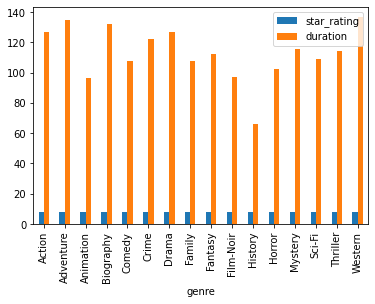

In [67]:
%matplotlib inline

movie.groupby("genre").mean().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

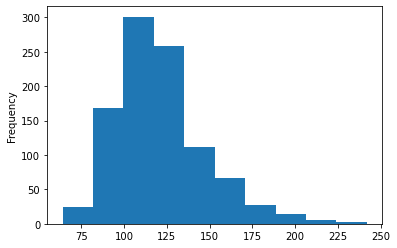

In [72]:
movie.duration.plot(kind="hist")

<AxesSubplot:>

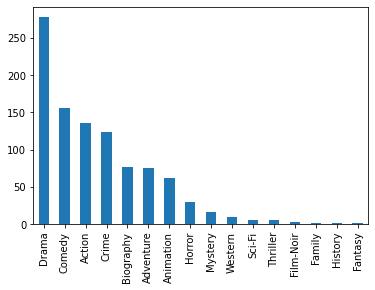

In [73]:
movie.genre.value_counts().plot(kind="bar")

# Handle missing values

In [114]:
import pandas as pd

In [115]:
report=pd.read_csv("http://bit.ly/uforeports")


In [117]:
# Rename columns

report.columns=report.columns.str.replace(" ","_")

report.head()

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [119]:
report.notnull()

,City,Colors_Reported,Shape_Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
...,...,...,...,...,...
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True


In [120]:
# Calculate the number of non-missing values
report.notnull().sum()

City               18216
Colors_Reported     2882
Shape_Reported     15597
State              18241
Time               18241
dtype: int64

In [121]:
# Calcuate the number of missing values
report.isnull().sum()

City                  25
Colors_Reported    15359
Shape_Reported      2644
State                  0
Time                   0
dtype: int64

### Display the missing values of a specific column

In [122]:
report[report.City.isnull()]

,City,Colors_Reported,Shape_Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


#### Drop all NA values

In [107]:
report=report.dropna(how="any") # how = all (only rows with all NA 

report.shape # We basically drop all the data

(2486, 5)

### Drop NA values in selected columns

In [125]:
report_select=report.dropna(subset=["City","Shape_Reported"])
                                    
report_select.head()

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### Filling NA 

In [136]:
report_select["Colors_Reported"]=report_select.Colors_Reported.fillna(value="My_Value")

report_select.head()

<ipython-input-136-1831efcbd668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_select["Colors_Reported"]=report_select.Colors_Reported.fillna(value="My_Value")


,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,My_Value,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,My_Value,OTHER,NJ,6/30/1930 20:00
2,Holyoke,My_Value,OVAL,CO,2/15/1931 14:00
3,Abilene,My_Value,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,My_Value,LIGHT,NY,4/18/1933 19:00


### Merging two or more columns or rows together

In [141]:
df1=pd.DataFrame({"Name":["Ha","Tuyen","Tri"],"Age":[25,36,24]})

df2=pd.DataFrame({"Name":["Nam","Tuyen","Nhu"],"Age":[12,36,45]})

df3=pd.concat([df1,df2],axis=0) # Concat rows 

df3

,Name,Age
0,Ha,25
1,Tuyen,36
2,Tri,24
0,Nam,12
1,Tuyen,36
2,Nhu,45


## Ordering categories 

In [145]:
df4=pd.DataFrame({"ID":[1,2,3,4,5],"quality":["Very good","Good","Excellent","Poor","Good"]})

# Convert to factor and order it

df4.head()

,ID,quality
0,1,Very good
1,2,Good
2,3,Excellent
3,4,Poor
4,5,Good


In [153]:
df4["quality"]=df4.quality.astype("category")

df4.quality.sort_values()

2    Excellent
1         Good
4         Good
3         Poor
0    Very good
Name: quality, dtype: category
Categories (4, object): ['Excellent', 'Good', 'Poor', 'Very good']

## Encoding cetegories

In [156]:
import pandas as pd

titanic=pd.read_csv("http://bit.ly/kaggletrain")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
# Encode Sex column

titanic["Sex_Col"]=titanic.Sex.map({"male":1,"female":0})

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Col
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Duplicate data

In [161]:
titanic.Ticket.duplicated().sum()

210

In [162]:
## See duplicated rows

titanic.loc[titanic.Ticket.duplicated(),:].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Col
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,0
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.900,NaN,S,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,0
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.000,NaN,S,1
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,0


In [163]:
titanic.loc[titanic.duplicated(),:].head() # No duplicated 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Col


In [164]:
# We can drop duplicated 

titanic.drop_duplicated()

AttributeError: 'DataFrame' object has no attribute 'drop_duplicate'